# PREÇOS DE IMÓVEIS - TÉCNICAS DE REGRESSÃO AVANÇADAS

### OBJETIVO

###### O preço de um imóvel é influenciado por diversos fatores, neste projeto vamos procurar qual a relação entre os diferente atributos que caracterizam uma casa com o seu preço. Para isto, utilizaremos técnicas de exploração de dados e técnicas de machine learning.

### SUMÁRIO

#### 1. CARREGAMENTO DOS DADOS
#### 2. EXPLORAÇÃO DOS DADOS
#### 3. ENGENHARIA DE ATRIBUTOS
#### 4. CONSTRUINDO UM MODELO LINEAR
#### 5. AVALIANDO A PERFORMANCE
#### 6. MELHORANDO O MODELO
#### 7. VISUALIZANDO RESULTADOS E CRIANDO .CSV

### 1. CARREGAMENTO DOS DADOS

###### 1.1. Importando as bibliotecas de manipulação e visualização de dados.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### 1.2. Carregando os datasets train e test.

In [165]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 2. EXPLORAÇÃO DOS DADOS

###### 2.1. Obtendo o tamanhos dos datasets.

In [166]:
train.shape

(1460, 81)

In [167]:
test.shape

(1459, 80)

###### 2.2. Obtendo as primeiras linhas dos datasets.

In [168]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


###### 2.3. Realizando plots para verificar a distribuição dos dados, procurar por outliers e verificar padrões.

###### Padronizando o estilo dos plots.

In [170]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

###### Neste projeto, queremos prever a variável SalePrice. Para obtermos mais informações sobre esta coluna como média, quantidade de valores, saber o valor mínimo, saber o valor máximo, vamos utilizar o método Series.describe().

In [171]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###### Agora que temos algumas informações sobre o dataset train, vamos utilizar o método Series.skew() para verificar a distribuição dos valores no dataset.

In [172]:
train.SalePrice.skew()

1.8828757597682129

###### Plotando a distribuição dos valores da coluna SalePrice.

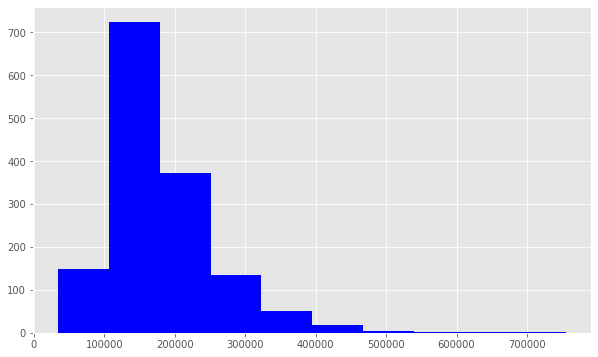

In [173]:
plt.hist(train.SalePrice, color = 'blue')
plt.show()

#### Observe que a distribuição decresce a direita. Portanto a distribuição é positivamente distorcida, chamamos o fato de Positively Skewed Distribution.

###### Como vamos realizar regressão, as vezes é eficiente aplicar log na variável alvo(target), que no caso é SalePrice, com o objetivo de obter linearidade nos dados. Para realizar tal aplicação utilizaremos a função np.log(). A seguir temos novas informações sobre a distribuição dos valores no dataset após aplicação da função.

In [174]:
target = np.log(train.SalePrice)

In [175]:
target.skew()

0.12133506220520406

###### Como agora temos um valor mais próximo de 0, temos que agora há uma melhor distribuição dos dados.

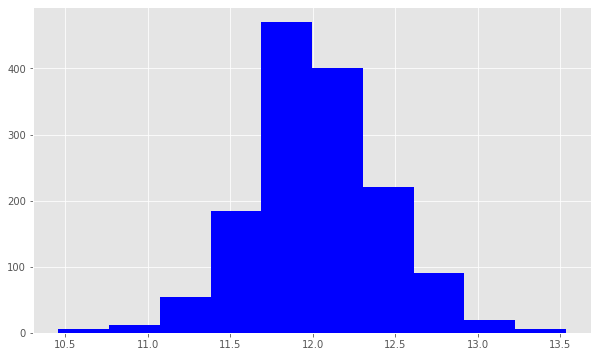

In [176]:
target.skew()
plt.hist(target, color = 'blue')
plt.show()

###### Temos que o gráfico agora indica aproximadamente uma distribuição normal, com isto podemos chamar a variável SalePrice de variável normal.

### 3. ENGENHARIA DE ATRIBUTOS

###### Neste processo vamos criar e remover atributos no dataset procurando melhorar o entendimento do problema pelo algoritmo a ser utilizado.

###### 3.1. Observando correlações entre colunas.

###### O método DataFrame.corr() nos retorna correlações entre colunas. Com isto, poderemos analisar as correlações com os atributos e a variável alvo(target) SalePrice.

In [177]:
#Selecionando os atributos numéricos
numeric_features = train.select_dtypes(include=[np.number])
#Aplicando a função
corr = numeric_features.corr()
#Retornando as correlações da colunas numéricas com relação a coluna SalePrice
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


###### Os primeiros 5 atributos(colunas) são mais positivamente correlacionadas com SalePrice. Por outro lado, os 5 últimos atributos são mais negativamente correlacionados com SalePrice.

###### 3.2. Manipulando outliers.

###### Começando por GarageArea, vamos usar a função plt.scatter() para verificar a relação entre este atributo e SalePrice.

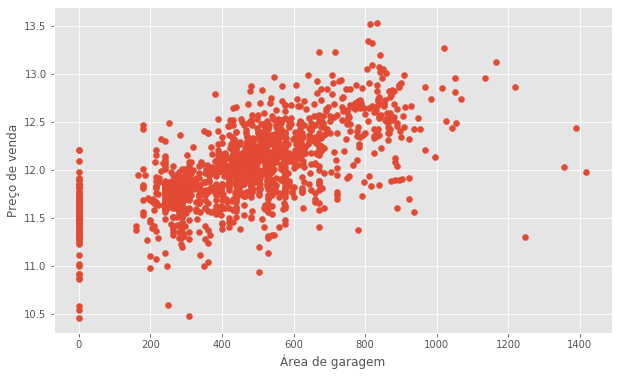

In [178]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Preço de venda')
plt.xlabel('Área de garagem')
plt.show()

###### Algumas casas indicam 0 em Garage Area, o que indica que nestas casas não há garagem. Além disto podemos ver que a maior parte se concentra entre 200 até 1200. Portanto podemos ver alguns outliers a partir de 1200, que não são bons para o modelo de regressão. Com isto vamos remover estes valores.

In [179]:
train = train[train['GarageArea'] < 1200]

###### Agora, temos o gráfico após remoção dos valores outliers.

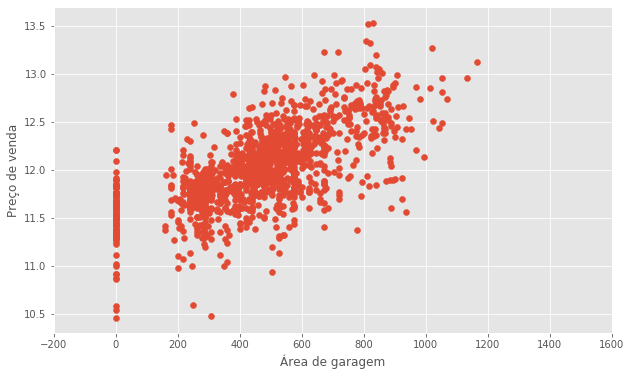

In [180]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) 
plt.ylabel('Preço de venda')
plt.xlabel('Área de garagem')
plt.show()

###### 3.3. Observando valores vazios.

###### Vamos criar um DataFrame para visualizar as colunas com maior quantidade de valores vazios e retornar as contagens dos valores vazios em cada coluna.

In [181]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


###### 3.4. Observando os atributos não-numéricos.

###### Vamos observar detalhes das colunas não numéricas.

In [182]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

###### A coluna count indica a quantidade de observações não-vazias, enquanto unique mostra a quantidade de valores únicos, e top mostra os valores mais ocorrentes, e além disto, freq mostra a frequencia dos valores mais ocorrentes(top).

###### 3.5. Transformando features(atributos)

###### Para trabalhar com estas variáveis categóricas vamos usar o método chamado one-hot encoding que transforma estas variáveis em colunas binárias. Porém, após o acerto do modelo, devemos aplicar estas mesmas alterações no dataset test.

###### 3.5.1. Considerando os dados de Street, que indicam se a estrada de acesso a propriedade é pavimentada(paved) ou não pavimentada(gravel)

In [183]:
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

###### Como este modelo precisa de dados numéricos, usaremos o método one-hot encoding para transformar os dados em uma coluna booleana.

In [184]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)
train.enc_street.value_counts()

1    1450
0       5
Name: enc_street, dtype: int64

###### Com isto paved = 1 e gravel = 0.

###### 3.5.2. Agora vamos olhar para a coluna SaleCondition construindo uma tabela pivot.

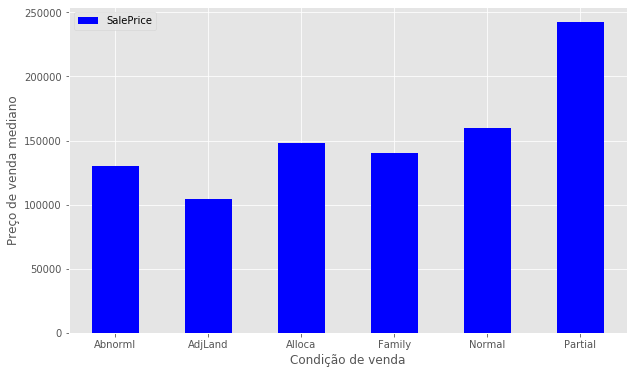

In [185]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condição de venda')
plt.ylabel('Preço de venda mediano')
plt.xticks(rotation=0)
plt.show()

###### Observem que as casas com condição de venda parcial tem preço mediano de venda maior que os outros. Com isto vamos aplicar novamente o método encode, considerando 1 as casas com condição de venda parcial e 0 as outras casas.

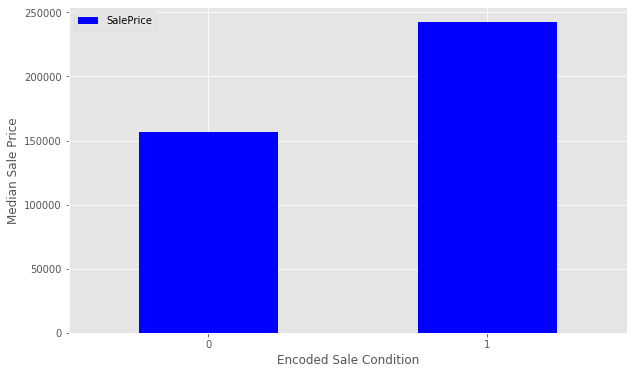

In [186]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condição de venda encoded')
plt.ylabel('Preço de venda mediano')
plt.xticks(rotation=0)
plt.show()

###### 3.6. Trabalhando os valores faltantes.

###### Vamos preencher os valores faltantes com valores médios e depois atribuir estes valores aos dados. Em geral, este método é um tipo de interpolação.

In [187]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

###### Com isto, podemos ver agora que não há valores vazios.

### 4. CONSTRUINDO UM MODELO LINEAR

###### 4.1. Importando as bibliotecas para o modelo linear. 

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

###### 4.2. Separação de atributos e remoção de atributos inutilizáveis

###### Agora vamos separar os atributos e a variável alvo(target) SalePrice para modelar os dados. Vamos atribuir os atributos para X e SalePrice vamos atribuir para y. Lembrando que usaremos a função np.log() para transformar a variável y para o modelo. Além disto data.drop([features], axis = 1) diz ao Pandas quais colunas queremos excluir. Com isto não iremos incluir SalePrice já que a variável alvo(target), e não iremos incluir Id já que é apenas um index sem relação com SalePrice.

In [189]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

###### 4.3. Particionando os dados

###### O particionamento dos dados dessa maneira nos permite avaliar como nosso modelo pode se comportar em dados que ele nunca viu antes. Se treinarmos o modelo em todos os dados de teste, será difícil dizer se ocorreu sobreajuste. Com isto, indicaremos a porcentagem do conjunto de dados que queremos considerar como conjunto de dados de teste. Neste exemplo, consideraremos cerca de 33% dos dados como dedicados ao conjunto de validação.

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

###### 4.4. Criando o modelo de regressão linear.

In [191]:
lr = linear_model.LinearRegression()

###### Agora precisamos ajustar o modelo. Estimaremos a relação entre os preditores e a variável alvo(target), para que possamos realizar predições eficientes nos novos dados.

In [192]:
model = lr.fit(X_train, y_train)

### 5. AVALIANDO A PERFORMANCE

###### O r-squared ou coeficiente de determinação será o valor usado para determinar o quanto os dados estão ajustados com o modelo de regressão. O intervalo para r-squared é [0, 1], onde 1 significa que os dados justificam toda variância na variável SalePrice. Em geral, quanto maior o valor de r-squared melhor ajustado está o modelo construído. Usaremos o método model.score() para retorno do r-squared.

In [193]:
model.score(X_test, y_test)

0.888247770926252

###### Agora vamos achar o RMSE (root mean squared error) que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses). Para isto, utilizaremos o modelo que construímos para fazer as predições no dataset test

In [194]:
predictions = model.predict(X_test)

In [195]:
mean_squared_error(y_test, predictions)

0.01784179451956809

###### Basicamente é a distância entre os valores de predição e os valores atuais.

###### Podemos ver esta relação graficamente a seguir

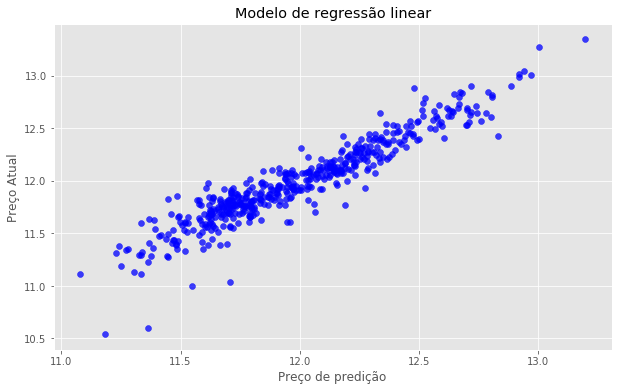

In [196]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # O alpha ajuda na visualização de dados sobrepostos
plt.xlabel('Preço de predição')
plt.ylabel('Preço Atual')
plt.title('Modelo de regressão linear')
plt.show()

###### Se os valores de predição fossem identicos aos atuais, então este gráfico seria o mais próximo de uma reta y=x. Porque cada valor de predição x seria igual a cada valor atual y.

### 6. MELHORANDO O MODELO

###### A seguir tentaremos usar a regularização de Ridge para diminuir a influência de atributos menos importantes. A regularização de Ridge é um processo que reduz os coeficientes de regressão de atributos menos importantes. O modelo de regularização de Ridge recebe um parâmetro, Alpha, que controla a força de regularização. A seguir testamos alguns valores para alpha em um loop, e verificamos com estes diferentes valores alteram os resultados.

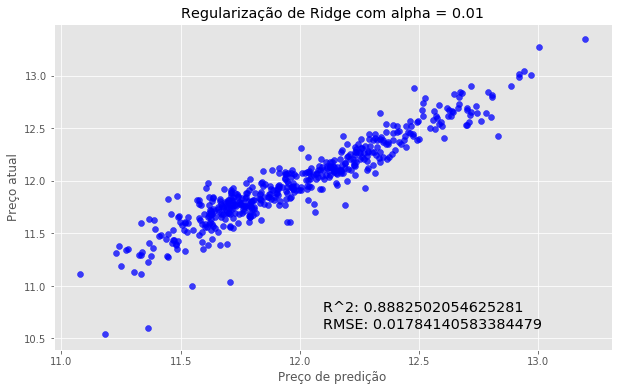

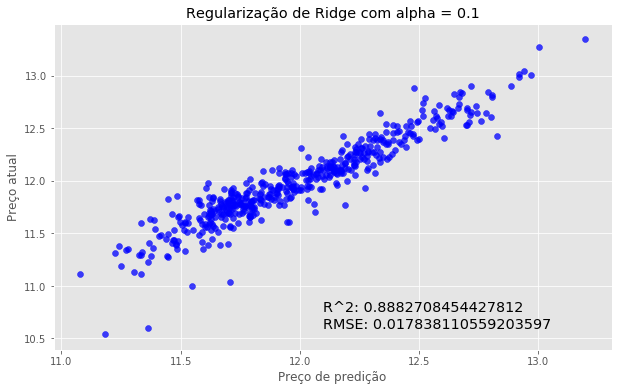

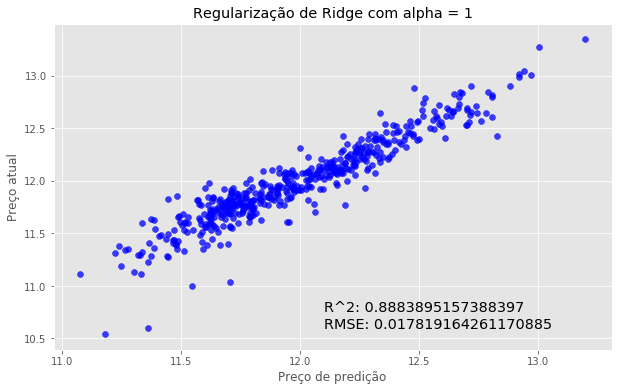

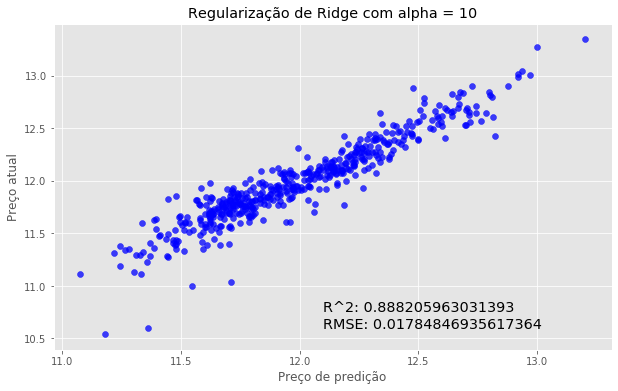

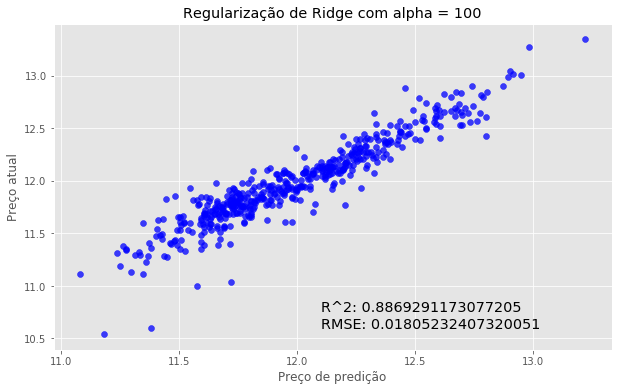

In [197]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Preço de predição')
    plt.ylabel('Preço atual')
    plt.title('Regularização de Ridge com alpha = {}'.format(alpha))
    overlay = 'R^2: {}\nRMSE: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

###### Verificamos que estes modelos tem perfomance semelhante ao primeiro modelo, o que nos indica que o ajuste do alpha somente não vai melhorar substancialmente a perfomance do modelo.

### 7. VISUALIZANDO RESULTADOS E CRIANDO .CSV

###### 7.1. Criando o dataframe submission.

###### Vamos criar um arquivo .csv que contenha os valores de SalePrice de predição para cada observação do test.csv. A primeira coluna tem que conter o ID do test.

In [198]:
submission = pd.DataFrame()
# A primeira coluna contém ID de test.
submission['Id'] = test.Id

###### 7.2. Selecionando os atributos de test para o modelo e gerando as predições.

In [199]:
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)

###### 7.3. Transformando as predições para o formato correto. 

###### Queremos reverter a função log(), aplicaremos np.exp() nas predições.

In [200]:
final_predictions = np.exp(predictions)

###### Agora vamos ver a diferença entre predictions e final_predictions

In [201]:
print("Predições originais: \n", predictions[:10], "\n")
print("Predições finais: \n", final_predictions[:10])

Predições originais: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Predições finais: 
 [128959.49172586 122920.74024357 175704.82598101 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133192 116214.02546462]


###### 7.4. Atribuindo as predições ao resultado final

In [202]:
submission['SalePrice'] = final_predictions

###### Observando os primeiros valores do resultado.

In [204]:
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


###### Criando .csv com resultado

In [205]:
submission.to_csv('submission1.csv', index=False)